In [1]:
from PIL import Image
import os

In [2]:
# Ruta de la imagen original y la máscara
image_path = r"C:\Users\Facu\Desktop\Deep learning pruebas\Sentinel2_Annual_Median_2022.png"
mask_path = r"C:\Users\Facu\Desktop\Deep learning pruebas\Label_1_Sentinel2_Annual_Median_2022.png"

# Directorio donde guardarás las partes recortadas
output_dir = r"C:\Users\Facu\Desktop\Deep learning pruebas\Images"
os.makedirs(output_dir, exist_ok=True)

# Cargar la imagen y la máscara
image = Image.open(image_path)
mask = Image.open(mask_path)

# Definir el número de divisiones por eje (en este caso, 50x50)
num_parts = 20
width, height = image.size
tile_width = width // num_parts
tile_height = height // num_parts

# Recorrer la imagen y la máscara en una cuadrícula
for i in range(num_parts):
    for j in range(num_parts):
        # Definir los límites del recorte
        left = i * tile_width
        upper = j * tile_height
        right = left + tile_width
        lower = upper + tile_height

        # Recortar la imagen y la máscara
        image_tile = image.crop((left, upper, right, lower))
        mask_tile = mask.crop((left, upper, right, lower))

        # Guardar las partes en archivos
        image_tile.save(os.path.join(output_dir, f"images_{i}_{j}.png"))
        mask_tile.save(os.path.join(output_dir, f"masks_{i}_{j}.png"))

print("División de imagen y máscara completada.")

División de imagen y máscara completada.


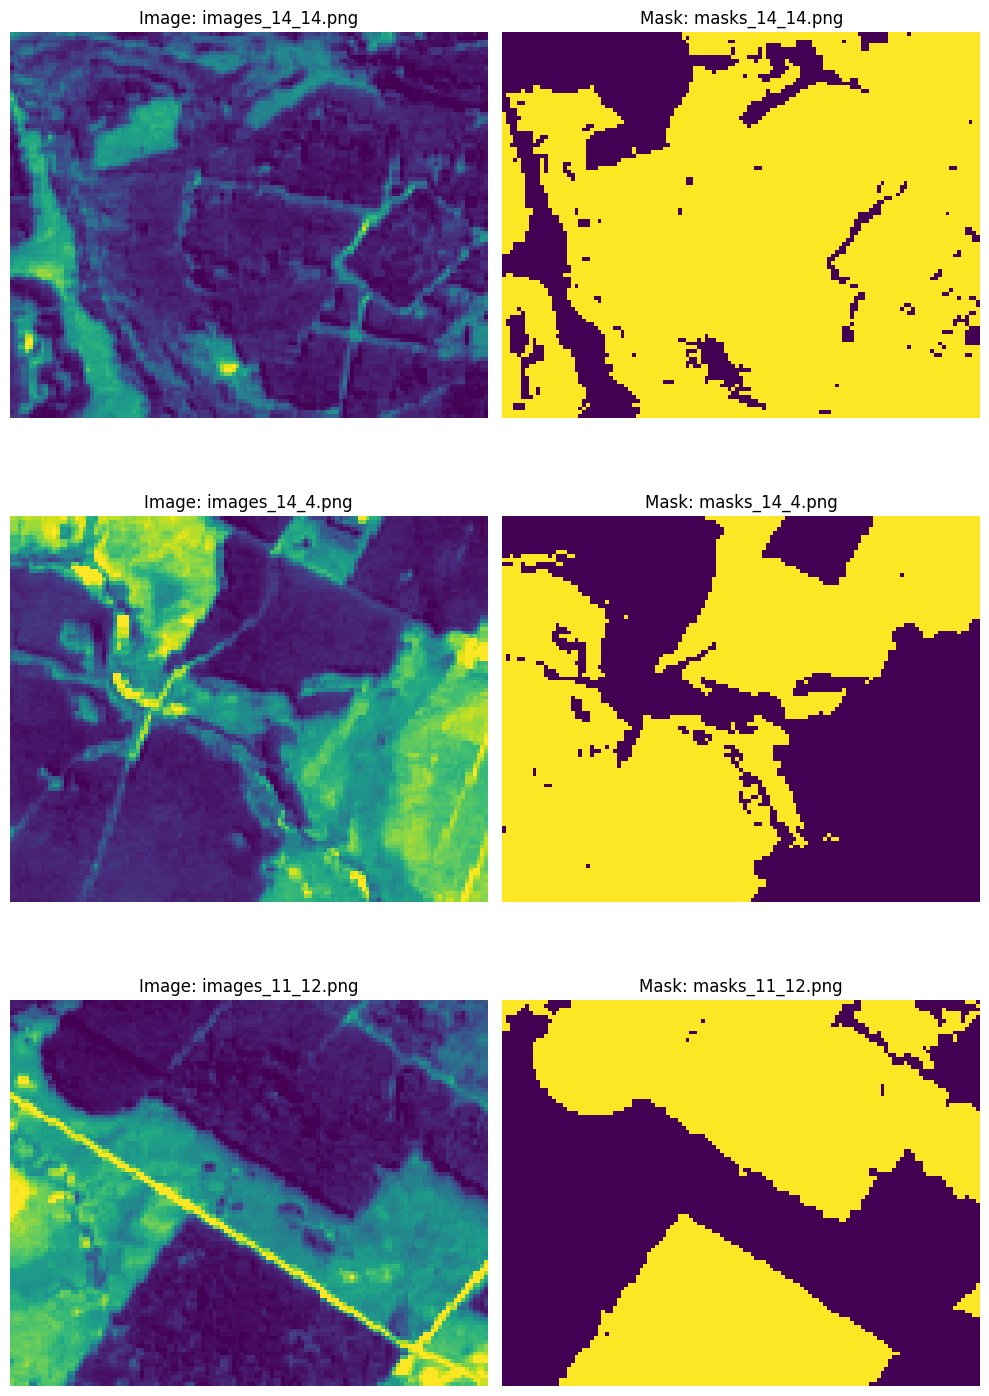

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

# Directorios de imágenes y máscaras
images_dir = r"C:\Users\Facu\Desktop\Deep learning pruebas\Data\images"
masks_dir = r"C:\Users\Facu\Desktop\Deep learning pruebas\Data\masks"

# Obtener lista de archivos de imágenes y máscaras
image_files = sorted([f for f in os.listdir(images_dir) if f.endswith('.png')])
mask_files = sorted([f for f in os.listdir(masks_dir) if f.endswith('.png')])

# Seleccionar tres pares de imágenes y máscaras al azar
samples = random.sample(list(zip(image_files, mask_files)), 3)

# Crear la figura para visualización
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Visualizar cada par de imagen y máscara
for i, (image_file, mask_file) in enumerate(samples):
    # Cargar la imagen y la máscara
    image = Image.open(os.path.join(images_dir, image_file))
    mask = Image.open(os.path.join(masks_dir, mask_file))

    # Mostrar imagen
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f"Image: {image_file}")
    axes[i, 0].axis('off')

    # Mostrar máscara con colormap
    axes[i, 1].imshow(mask, cmap='viridis')  # Puedes usar otros cmap como 'jet', 'plasma', etc.
    axes[i, 1].set_title(f"Mask: {mask_file}")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()


In [12]:
import os
import shutil
import random

tiles_dir = r"C:\Users\Facu\Desktop\Deep learning pruebas\Images\Tiles"
masks_dir = r"C:\Users\Facu\Desktop\Deep learning pruebas\Images\Masks"


# Directorio de salida para los conjuntos de entrenamiento y prueba
output_dir = r"C:\Users\Facu\Desktop\Deep learning pruebas"
train_tiles_dir = os.path.join(output_dir, "train", "tiles_train")
train_masks_dir = os.path.join(output_dir, "train", "masks_train")
test_tiles_dir = os.path.join(output_dir, "test", "tiles_test")
test_masks_dir = os.path.join(output_dir, "test", "masks_test")

# Crear los directorios si no existen
os.makedirs(train_tiles_dir, exist_ok=True)
os.makedirs(train_masks_dir, exist_ok=True)
os.makedirs(test_tiles_dir, exist_ok=True)
os.makedirs(test_masks_dir, exist_ok=True)

# Obtener lista de archivos de tiles y máscaras
tiles_files = sorted([f for f in os.listdir(tiles_dir) if f.endswith('.png')])
masks_files = sorted([f for f in os.listdir(masks_dir) if f.endswith('.png')])

# Asegurar que el número de archivos coincida entre tiles y máscaras
assert len(tiles_files) == len(masks_files), "El número de tiles y máscaras no coincide."

# Mezclar y dividir en 80% entrenamiento y 20% prueba
data = list(zip(tiles_files, masks_files))
random.shuffle(data)
split_index = int(0.8 * len(data))
train_data = data[:split_index]
test_data = data[split_index:]

# Función para copiar archivos a los directorios correspondientes
def copy_files(data, tiles_source, masks_source, tiles_dest, masks_dest):
    for tile_file, mask_file in data:
        shutil.copy(os.path.join(tiles_source, tile_file), os.path.join(tiles_dest, tile_file))
        shutil.copy(os.path.join(masks_source, mask_file), os.path.join(masks_dest, mask_file))

# Copiar archivos de entrenamiento
copy_files(train_data, tiles_dir, masks_dir, train_tiles_dir, train_masks_dir)

# Copiar archivos de prueba
copy_files(test_data, tiles_dir, masks_dir, test_tiles_dir, test_masks_dir)

print("División en conjuntos de entrenamiento y prueba completada.")


División en conjuntos de entrenamiento y prueba completada.
